In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load the dataset
netflix_data = pd.read_csv("netflix_titles.csv")  # Replace with your file path

# Display the first few rows
print(netflix_data.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [ ]:
# Check for missing values
print(netflix_data.isnull().sum())

# Fill missing 'cast' and 'country' with 'Unknown'
netflix_data['cast'].fillna("Unknown", inplace=True)
netflix_data['country'].fillna("Unknown", inplace=True)

# Fill missing 'date_added' and 'rating' with the mode
netflix_data['date_added'].fillna(netflix_data['date_added'].mode()[0], inplace=True)
netflix_data['rating'].fillna(netflix_data['rating'].mode()[0], inplace=True)

# Drop rows with missing 'director' (since it's a small percentage)
netflix_data.dropna(subset=['director'], inplace=True)

# Convert 'date_added' to datetime format
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], format = 'mixed') 
# format='mixed', allowing Pandas to infer formats individually:

# Check the cleaned data
print(netflix_data.head())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64
  show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
2      s3  TV Show                         Ganglands   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   

                        director  \
0                Kirsten Johnson   
2                Julien Leclercq   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   

                                                cast  \
0                                            Unknown   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H

C:\Users\Prajwal Gowda\AppData\Local\Temp\ipykernel_21972\3582614164.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['cast'].fillna("Unknown", inplace=True)
C:\Users\Prajwal Gowda\AppData\Local\Temp\ipykernel_21972\3582614164.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

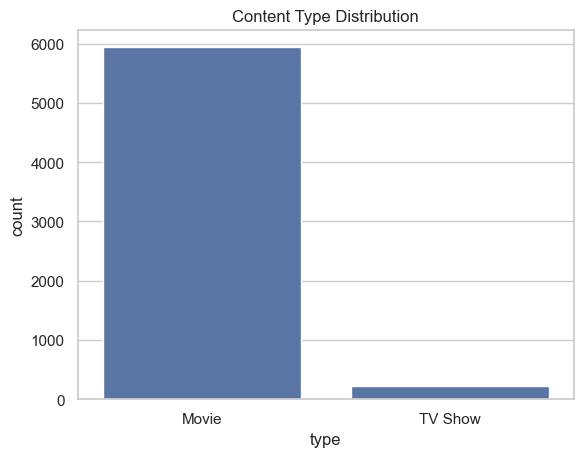

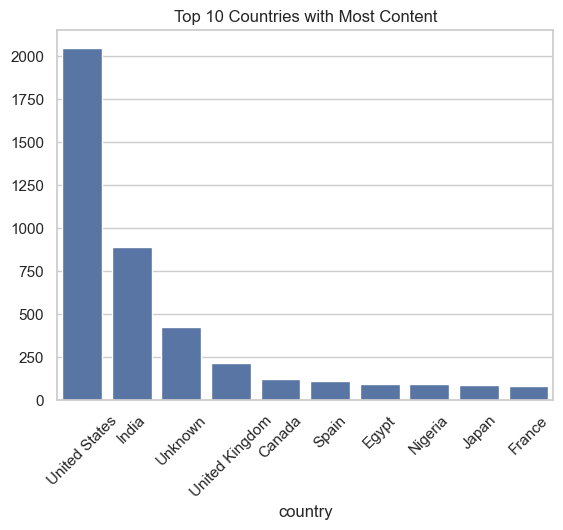

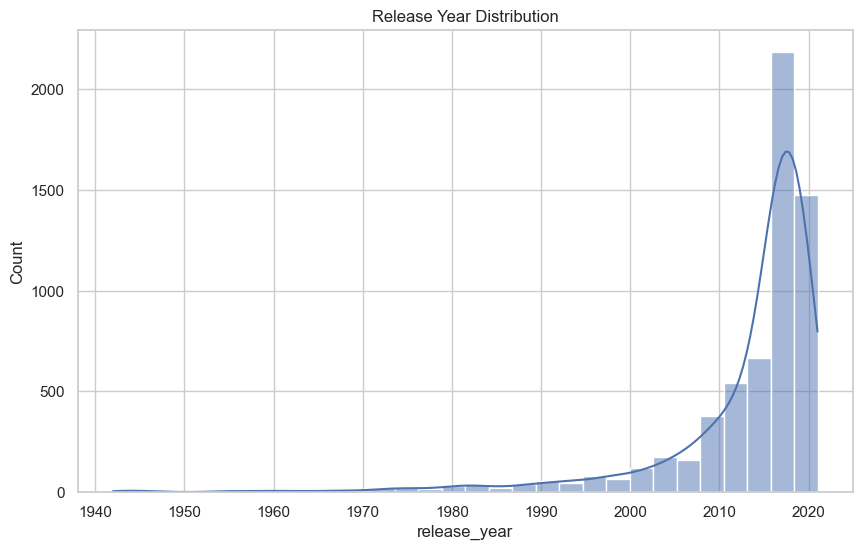

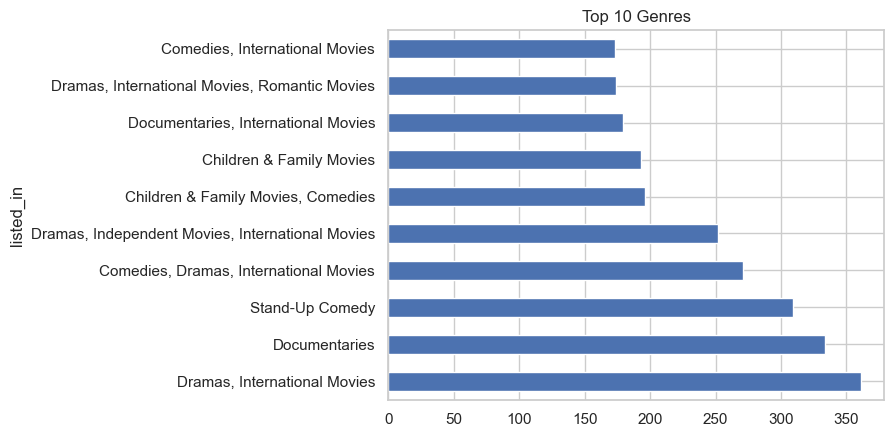

In [6]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Content type distribution (Movies vs. TV Shows)
sns.countplot(x='type', data=netflix_data)
plt.title("Content Type Distribution")
plt.show()

# Top 10 countries with the most content
top_countries = netflix_data['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries with Most Content")
plt.xticks(rotation=45)
plt.show()

# Release year distribution
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['release_year'], bins=30, kde=True)
plt.title("Release Year Distribution")
plt.show()

# Top 10 genres
netflix_data['listed_in'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Genres")
plt.show()